## Image De-Identification using CleverDoc

![apicom.pro](https://apicom.pro/static/logo-small-borderless.8f68168a2b0e.png)

In [ ]:
%pip install -U cleverdoc[inference-gpu]

In [23]:
license = ""

from cleverdoc import *
spark = start(license )
spark

Spark version: 3.4.2
CleverDoc version: 1.0.8


In [17]:
import pyspark.sql.functions as f
import importlib.resources
from pyspark.ml.pipeline import PipelineModel

binary_to_image = BinaryToImage()

image_to_string = ImageToString() \
    .setKeepInput(True)

ner = Ner() \
        .setOutputCol("ner") \
        .setModel("ApicomPro/deid-bert-onnx-1.2.0")\
        .setNumPartitions(1) \
        .setDevice(-1) \
        .setThreshold(0.0)

image_draw_boxes = ImageDrawBoxes()\
    .setInputCols(["image", "ner"]) \
    .setOutputCol("image_with_boxes") \
    .setFilled(True) \
    .setColor("grey")

pipeline = PipelineModel(stages=[binary_to_image,
                                 image_to_string,
                                 ner,
                                 image_draw_boxes
                                ])

License uid: a6e80c86-204a-11ef-976d-0242ac130004
License expiration date: 2025-06-02 01:59:59


License uid: a6e80c86-204a-11ef-976d-0242ac130004
License expiration date: 2025-06-02 01:59:59
License uid: a6e80c86-204a-11ef-976d-0242ac130004
License expiration date: 2025-06-02 01:59:59


Run Pdf to Image



    Image #0:
    Origin: Personal_Health_Record_Example.png
    Resolution: 300 dpi
    Width: 2469 px
    Height: 3500 px


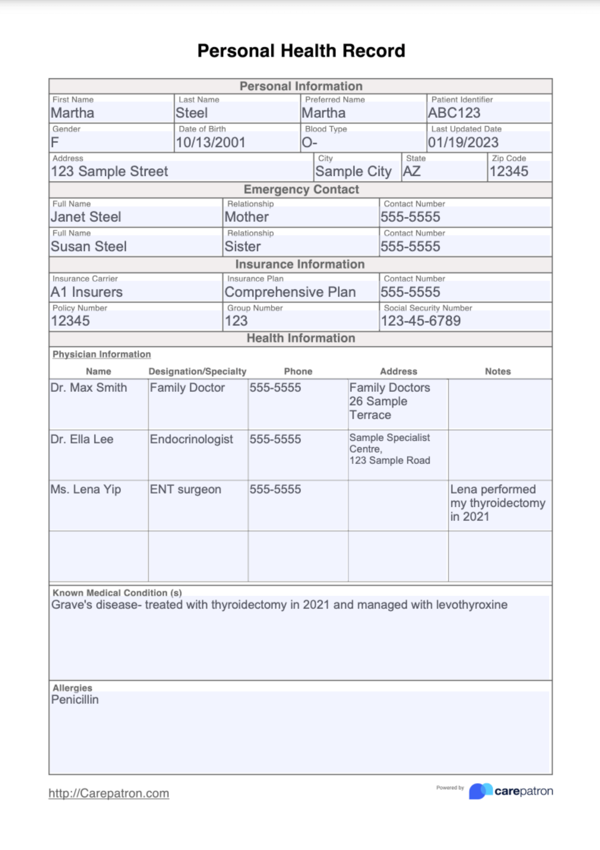

In [18]:
image_example = importlib.resources.files('cleverdoc').joinpath('resources/images/Personal_Health_Record_Example.png').as_posix()
df = spark.read.format("binaryFile").load(image_example)
show_images(df, "content", limit=1)

2024-06-27 10:22:43.758359 INFO: Run NER



    Image #0:
    Origin: Personal_Health_Record_Example.png
    Resolution: 0 dpi
    Width: 790 px
    Height: 1120 px


2024-06-27 10:22:46.139673 INFO: Start processing NER
2024-06-27 10:22:46.215599 INFO: End NER


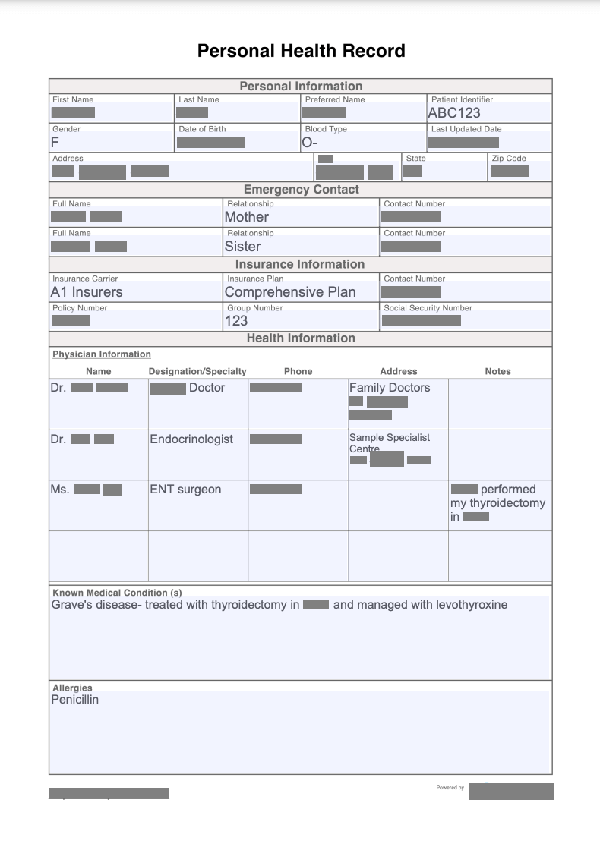

In [24]:
result = pipeline.transform(df)
show_images(result, "image_with_boxes", 10)

In [20]:
print(result.select("text.text").collect()[0][0])

Personal Health Record Personal Information First Name Tast Name Preferred Name Patient Identifier Martha Steel Martha |ABC123 Gender Date of Birth Blood Tyee ast Updated Date F 10/13/2001 lo- 01/19/2023 ‘adress City sate Zip Code 123 Sample Street ‘Sample City |AZ 12345 Full Name Emergency Contact Contact Number Relationship Janet Steel Mother 555-5555 Full Name Rolationship Contact Number Susan Steel Sister 555-5555 Insurance Information Tnsurance Carrier Tasurance Plan Contact Number |A1 Insurers Comprehensive Plan 555-5555 Policy Number Group Number Social Security Number 12345 123 123-45-6789 Health Information Physician Information Name Designation/Specialty Phone Address Notes Dr. Max Smith Family Doctor 555-5555 Family Doctors 26 Sample Terrace Dr. Ella Lee Endocrinologist 555-5555 meal sneclal Centr 123 Sample Road IMs. Lena Yip ENT surgeon 555-5555 Lena performed my thyroidectomy in 2021 Known Medical Condition (8) Grave’ ease- treated with thyroidectomy in 2021 and managed w

In [22]:
result.select(f.explode("ner.entities").alias("entities")).select("entities.*").show(50)

2024-06-27 10:21:45.195894 INFO: Run NER
2024-06-27 10:21:47.498162 INFO: Start processing NER               (0 + 1) / 1]
2024-06-27 10:21:47.574079 INFO: End NER
2024-06-27 10:21:48.760303 INFO: Run NER


+------------+-------------------+------------+-----+----+--------------------+
|entity_group|              score|        word|start| end|               boxes|
+------------+-------------------+------------+-----+----+--------------------+
|     PATIENT| 0.9981312155723572|      Martha|   99| 105|[{Martha, 93.9363...|
|     PATIENT| 0.9908564686775208|Steel Martha|  106| 118|[{Steel, 74.68806...|
|        DATE| 0.9995028972625732|          10|  178| 180|[{10/13/2001, 85....|
|        DATE| 0.9933504462242126|          13|  181| 183|[{10/13/2001, 85....|
|        DATE| 0.8088937401771545|        2001|  184| 188|[{10/13/2001, 85....|
|        DATE| 0.9996228218078613|          01|  193| 195|[{01/19/2023, 73....|
|        DATE| 0.9829621911048889|          19|  196| 198|[{01/19/2023, 73....|
|        DATE| 0.9455496072769165|        2023|  199| 203|[{01/19/2023, 73....|
|         LOC| 0.9476125240325928|        City|  212| 216|[{City, 54.602626...|
|         LOC| 0.9958053827285767|  123 

2024-06-27 10:21:51.465008 INFO: Start processing NER
2024-06-27 10:21:51.541881 INFO: End NER
